In [1]:
# Import necessary files
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read row files data
rowConv = pd.read_csv('data/table_A_conversions.csv')
rowAttr = pd.read_csv('data/table_B_attribution.csv')

In [3]:
# print files details
print(rowConv.info())
print('\n')
print(rowAttr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79643 entries, 0 to 79642
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Conv_Date  79643 non-null  object 
 1   Revenue    79643 non-null  float64
 2   User_ID    77347 non-null  object 
 3   Conv_ID    79643 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.4+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211060 entries, 0 to 211059
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Channel   211060 non-null  object 
 1   IHC_Conv  211060 non-null  float64
 2   Conv_ID   211060 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.8+ MB
None


In [4]:
# Merge two tables based on Conv_ID with innerjoin to get common data only
rowMerged = rowConv.merge(rowAttr, on='Conv_ID', how='inner')

In [5]:
# Explore new table
print('Info\n')
print(rowMerged.info())
print('\n------------------------------------\nHead\n')
print(rowMerged.head())
print('\n------------------------------------\nNumber of unique categories in each field\n')
print(rowMerged.nunique())
print('\n------------------------------------\nNumber of missing values and its portion of the data\n')
print(pd.DataFrame({'count':rowMerged.isnull().sum(), 'Pct% of the data':rowMerged.isnull().mean() * 100}))

Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211060 entries, 0 to 211059
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Conv_Date  211060 non-null  object 
 1   Revenue    211060 non-null  float64
 2   User_ID    204422 non-null  object 
 3   Conv_ID    211060 non-null  object 
 4   Channel    211060 non-null  object 
 5   IHC_Conv   211060 non-null  float64
dtypes: float64(2), object(4)
memory usage: 11.3+ MB
None

------------------------------------
Head

    Conv_Date    Revenue                                   User_ID  \
0  2017-03-06   47.00000  5094298f068196c5349d43847de5afc9125cf989   
1  2017-03-02   98.00004                                       NaN   
2  2017-03-02   98.00004                                       NaN   
3  2017-03-02   98.00004                                       NaN   
4  2017-03-02  180.35300                                       NaN   

                                 

In [6]:
# Remove missing data since only 6638 rows have missing data (about 3%)
rowMerged.dropna(axis=0, how='any', inplace=True)
rowMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204422 entries, 0 to 211059
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Conv_Date  204422 non-null  object 
 1   Revenue    204422 non-null  float64
 2   User_ID    204422 non-null  object 
 3   Conv_ID    204422 non-null  object 
 4   Channel    204422 non-null  object 
 5   IHC_Conv   204422 non-null  float64
dtypes: float64(2), object(4)
memory usage: 10.9+ MB


In [7]:
# Fix Conv_Date and Channel columns data types
print('data types before fixing :\n')
print(rowMerged.dtypes)
rowMerged.Conv_Date = pd.to_datetime(rowMerged.Conv_Date)
rowMerged.Channel = rowMerged.Channel.astype('category')
print('\n\ndata types after fixing :\n')
print(rowMerged.dtypes)

data types before fixing :

Conv_Date     object
Revenue      float64
User_ID       object
Conv_ID       object
Channel       object
IHC_Conv     float64
dtype: object


data types after fixing :

Conv_Date    datetime64[ns]
Revenue             float64
User_ID              object
Conv_ID              object
Channel            category
IHC_Conv            float64
dtype: object


In [8]:
# Data range and taking snapshot_date
print('Min:{}; Max:{}'.format(min(rowMerged.Conv_Date),max(rowMerged.Conv_Date)))

snapshot_date = max(rowMerged.Conv_Date) + timedelta(days=1)

Min:2017-03-01 00:00:00; Max:2018-03-26 00:00:00


In [9]:
rowMerged[rowMerged.IHC_Conv == 0]

Conv_Date    Revenue                                   User_ID  \
32     2017-03-10  156.70604  b7d38ff2747f3ebe3c6b4e6169dbb7c761177a2e   
33     2017-03-10  156.70604  b7d38ff2747f3ebe3c6b4e6169dbb7c761177a2e   
35     2017-03-10  156.70604  b7d38ff2747f3ebe3c6b4e6169dbb7c761177a2e   
41     2017-03-12  157.58840  43f8f28b5694780061d62488217b08bf7b7ddf1a   
44     2017-03-12  157.58840  43f8f28b5694780061d62488217b08bf7b7ddf1a   
...           ...        ...                                       ...   
211032 2018-03-26   68.30400  3efe3f988d7b9ebb50ffb190ace2c7a65afb339a   
211034 2018-03-26   68.30400  3efe3f988d7b9ebb50ffb190ace2c7a65afb339a   
211041 2018-03-26  379.04400  54219d4259224e545086db527d4a1708d6155a62   
211051 2018-03-26  165.86000  bbc08d8abad5e699823f2f0021762797941679be   
211059 2018-03-26  119.50400  b3f02d0768c0ba8334047d106eb759f3e80517ac   

                                         Conv_ID Channel  IHC_Conv  
32      7ebdca036560070819aa40c4ad8e8e66df2e5bc5       A       0.0  
33      7ebdca036560070819aa40c4ad8e8e66df2e5bc5       C       0.0  
35      7ebdca036560070819aa40c4ad8e8e66df2e5bc5       H       0.0  
41      1f6aeb31be558eafd39d4c4972e43f3104307232       A       0.0  
44      1f6aeb31be558eafd39d4c4972e43f3104307232       E       0.0  
...                                          ...     ...       ...  
211032  ecbe2f45cbc0f599f93d3db96bd2581fd0acb4a6       I       0.0  
211034  ecbe2f45cbc0f599f93d3db96bd2581fd0acb4a6       K       0.0  
211041  c96e2a6b6c426bd7e25c62daf7432667de41e7a4       H       0.0  
211051  79a098aab7641fdea9499a91441a1aadf5212f6d       I       0.0  
211059  2d94a2d0fc7408bb2210d012ba96d2a9949e4e45       M       0.0  

[38718 rows x 6 columns]

In [10]:
# Check whether any users conversed in the same day or more than one day
(rowMerged.groupby('Conv_ID')['Conv_Date'].agg('nunique') > 1).sum()

0

In [11]:
ihcPerConv = rowMerged.pivot(index='Conv_ID', columns='Channel', values='IHC_Conv')
ihcPerConv.sort_index(inplace=True)
ihcPerConv.head()

Channel                                          A         B         C  \
Conv_ID                                                                  
0000ccb093df86fd1480a0aa5c2167233f8ab9cf  0.540098       NaN       NaN   
0000ea3393004ed1e855e74f5eec5ad96270a816       NaN       NaN       NaN   
00011c4ee4c3484ebaf68d328668f9c97c5eaa4f  0.549969  0.450031       NaN   
00015d1120d462a27b4a58b4e3b63b3831be28f8  0.323511  0.676489       NaN   
00061879cf1e7229b4957a0d31723df0d5767cf3  0.910853  0.025606  0.039688   

Channel                                        D         E   F         G   H  \
Conv_ID                                                                        
0000ccb093df86fd1480a0aa5c2167233f8ab9cf  0.3786       NaN NaN  0.081302 NaN   
0000ea3393004ed1e855e74f5eec5ad96270a816     NaN       NaN NaN  1.000000 NaN   
00011c4ee4c3484ebaf68d328668f9c97c5eaa4f     NaN       NaN NaN       NaN NaN   
00015d1120d462a27b4a58b4e3b63b3831be28f8     NaN       NaN NaN       NaN NaN   
00061879cf1e7229b4957a0d31723df0d5767cf3     NaN  0.013145 NaN  0.007938 NaN   

Channel                                         I   J  ...   M   N   O   P  \
Conv_ID                                                ...                   
0000ccb093df86fd1480a0aa5c2167233f8ab9cf      NaN NaN  ... NaN NaN NaN NaN   
0000ea3393004ed1e855e74f5eec5ad96270a816      NaN NaN  ... NaN NaN NaN NaN   
00011c4ee4c3484ebaf68d328668f9c97c5eaa4f      NaN NaN  ... NaN NaN NaN NaN   
00015d1120d462a27b4a58b4e3b63b3831be28f8      NaN NaN  ... NaN NaN NaN NaN   
00061879cf1e7229b4957a0d31723df0d5767cf3  0.00277 NaN  ... NaN NaN NaN NaN   

Channel                                    Q   R   S   T   U   V  
Conv_ID                                                           
0000ccb093df86fd1480a0aa5c2167233f8ab9cf NaN NaN NaN NaN NaN NaN  
0000ea3393004ed1e855e74f5eec5ad96270a816 NaN NaN NaN NaN NaN NaN  
00011c4ee4c3484ebaf68d328668f9c97c5eaa4f NaN NaN NaN NaN NaN NaN  
00015d1120d462a27b4a58b4e3b63b3831be28f8 NaN NaN NaN NaN NaN NaN  
00061879cf1e7229b4957a0d31723df0d5767cf3 NaN NaN NaN NaN NaN NaN  

[5 rows x 22 columns]

In [65]:
print("Range of Sum of all IHC for each Conversion ID is below: so we can conclude that it equals 1 for each conversion")
print(ihcPerConv.sum(axis=1).quantile([0, 1]).round(2).set_axis(['min', 'max'], axis=0))

Range of Sum of all IHC for each Conversion ID is below: so we can conclude that it equals 1 for each conversion
min    1.0
max    1.0
dtype: float64


In [12]:
cleanMerged = rowMerged.drop(['Channel', 'IHC_Conv'], axis=1)
cleanMerged.drop_duplicates(inplace=True)
cleanMerged.set_index('Conv_ID', inplace=True)
cleanMerged.sort_index(inplace=True)
cleanMerged.head()

Conv_Date    Revenue  \
Conv_ID                                                          
0000ccb093df86fd1480a0aa5c2167233f8ab9cf 2017-11-27  230.97600   
0000ea3393004ed1e855e74f5eec5ad96270a816 2017-03-12  135.76448   
00011c4ee4c3484ebaf68d328668f9c97c5eaa4f 2017-11-25  114.50400   
00015d1120d462a27b4a58b4e3b63b3831be28f8 2017-10-17   90.90000   
00061879cf1e7229b4957a0d31723df0d5767cf3 2018-03-16  108.03600   

                                                                           User_ID  
Conv_ID                                                                             
0000ccb093df86fd1480a0aa5c2167233f8ab9cf  9e33e0f30f3f76b4581faea2310cce386769fe12  
0000ea3393004ed1e855e74f5eec5ad96270a816  7fe7f993b2607fb0a49ddbb2b2836fd3673128a1  
00011c4ee4c3484ebaf68d328668f9c97c5eaa4f  5292372b8a4f1e07c91a50e15c7d06ff3f14a7e4  
00015d1120d462a27b4a58b4e3b63b3831be28f8  4e6e92b9ce6507da6c68d71871fdd572b2d845ab  
00061879cf1e7229b4957a0d31723df0d5767cf3  310e3421aa1d5ff61b48cc153b460123218c0d10

In [13]:
cleanData = pd.concat([cleanMerged, ihcPerConv], axis=1).reset_index()
cleanData.to_csv('data/cleanData.csv')
cleanData.head()

Conv_ID  Conv_Date    Revenue  \
0  0000ccb093df86fd1480a0aa5c2167233f8ab9cf 2017-11-27  230.97600   
1  0000ea3393004ed1e855e74f5eec5ad96270a816 2017-03-12  135.76448   
2  00011c4ee4c3484ebaf68d328668f9c97c5eaa4f 2017-11-25  114.50400   
3  00015d1120d462a27b4a58b4e3b63b3831be28f8 2017-10-17   90.90000   
4  00061879cf1e7229b4957a0d31723df0d5767cf3 2018-03-16  108.03600   

                                    User_ID         A         B         C  \
0  9e33e0f30f3f76b4581faea2310cce386769fe12  0.540098       NaN       NaN   
1  7fe7f993b2607fb0a49ddbb2b2836fd3673128a1       NaN       NaN       NaN   
2  5292372b8a4f1e07c91a50e15c7d06ff3f14a7e4  0.549969  0.450031       NaN   
3  4e6e92b9ce6507da6c68d71871fdd572b2d845ab  0.323511  0.676489       NaN   
4  310e3421aa1d5ff61b48cc153b460123218c0d10  0.910853  0.025606  0.039688   

        D         E   F  ...   M   N   O   P   Q   R   S   T   U   V  
0  0.3786       NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1     NaN       NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2     NaN       NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3     NaN       NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4     NaN  0.013145 NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 26 columns]

In [14]:
# Time cohort
# Define a function that will parse the date
def get_day(x): return datetime(x.year, x.month, 1) 

In [15]:
# Create InvoiceMonth column
cleanData['InvoiceMonth'] = cleanData.Conv_Date.apply(get_day)

# Group by User_ID and select the InvoiceMonth value
grouping = cleanData.groupby('User_ID')['InvoiceMonth'] 

# Assign a minimum InvoiceDay value to the dataset
cleanData['CohortMonth'] = grouping.transform('min')

# View the top 5 rows
print(cleanData.head())

                                    Conv_ID  Conv_Date    Revenue  \
0  0000ccb093df86fd1480a0aa5c2167233f8ab9cf 2017-11-27  230.97600   
1  0000ea3393004ed1e855e74f5eec5ad96270a816 2017-03-12  135.76448   
2  00011c4ee4c3484ebaf68d328668f9c97c5eaa4f 2017-11-25  114.50400   
3  00015d1120d462a27b4a58b4e3b63b3831be28f8 2017-10-17   90.90000   
4  00061879cf1e7229b4957a0d31723df0d5767cf3 2018-03-16  108.03600   

                                    User_ID         A         B         C  \
0  9e33e0f30f3f76b4581faea2310cce386769fe12  0.540098       NaN       NaN   
1  7fe7f993b2607fb0a49ddbb2b2836fd3673128a1       NaN       NaN       NaN   
2  5292372b8a4f1e07c91a50e15c7d06ff3f14a7e4  0.549969  0.450031       NaN   
3  4e6e92b9ce6507da6c68d71871fdd572b2d845ab  0.323511  0.676489       NaN   
4  310e3421aa1d5ff61b48cc153b460123218c0d10  0.910853  0.025606  0.039688   

        D         E   F  ...   O   P   Q   R   S   T   U   V  InvoiceMonth  \
0  0.3786       NaN NaN  ... NaN NaN NaN NaN

In [16]:
# Calculate time offset in days
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
#     day = df[column].dt.day
    return year, month

In [17]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month = get_date_int(cleanData, 'InvoiceMonth')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month = get_date_int(cleanData, 'CohortMonth')

In [18]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
cleanData['CohortIndex'] = years_diff * 12 + months_diff + 1
print(cleanData.head())

                                    Conv_ID  Conv_Date    Revenue  \
0  0000ccb093df86fd1480a0aa5c2167233f8ab9cf 2017-11-27  230.97600   
1  0000ea3393004ed1e855e74f5eec5ad96270a816 2017-03-12  135.76448   
2  00011c4ee4c3484ebaf68d328668f9c97c5eaa4f 2017-11-25  114.50400   
3  00015d1120d462a27b4a58b4e3b63b3831be28f8 2017-10-17   90.90000   
4  00061879cf1e7229b4957a0d31723df0d5767cf3 2018-03-16  108.03600   

                                    User_ID         A         B         C  \
0  9e33e0f30f3f76b4581faea2310cce386769fe12  0.540098       NaN       NaN   
1  7fe7f993b2607fb0a49ddbb2b2836fd3673128a1       NaN       NaN       NaN   
2  5292372b8a4f1e07c91a50e15c7d06ff3f14a7e4  0.549969  0.450031       NaN   
3  4e6e92b9ce6507da6c68d71871fdd572b2d845ab  0.323511  0.676489       NaN   
4  310e3421aa1d5ff61b48cc153b460123218c0d10  0.910853  0.025606  0.039688   

        D         E   F  ...   P   Q   R   S   T   U   V  InvoiceMonth  \
0  0.3786       NaN NaN  ... NaN NaN NaN NaN NaN

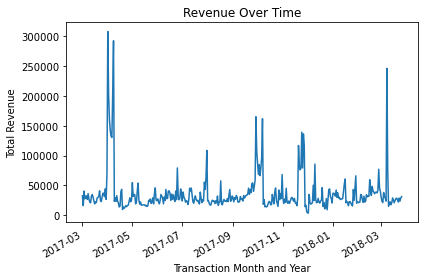

In [69]:
# Revenue over time
groupedByDate = cleanData.groupby('Conv_Date')
groupedByDate['Revenue'].sum().plot()
plt.title('Revenue Over Time')
plt.xlabel('Transaction Month and Year')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.savefig('visualizations/Revenue_Over_Time.png', dpi=600)
plt.show()

In [20]:
# Fraction of return cutomers
fracReturnCustomers = (cleanData.groupby('User_ID')['Conv_ID'].nunique() > 1).sum() / cleanData.User_ID.nunique()
print('Fraction of return cutomers is {:.2f} %'.format(fracReturnCustomers * 100))

Fraction of return cutomers is 16.12 %


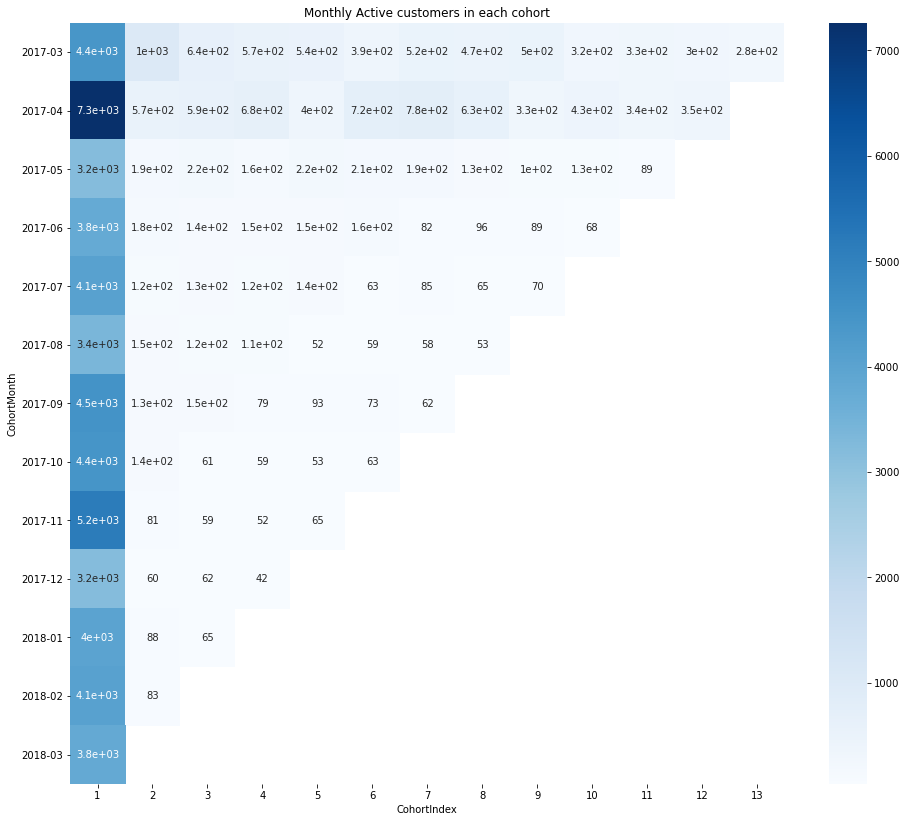

In [21]:
# Monthly Active customers in each cohort
# groupby(['CohortMonth', 'CohortIndex']
grouping = cleanData.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per customer ID
cohort_data = grouping['User_ID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='User_ID')

cohort_counts.index = cohort_counts.index.to_period('M')
plt.figure(figsize=(16, 14))
plt.title('Monthly Active customers in each cohort')
sns.heatmap(data=cohort_counts, annot=True, cmap='Blues')
plt.yticks(rotation=0)
plt.show()

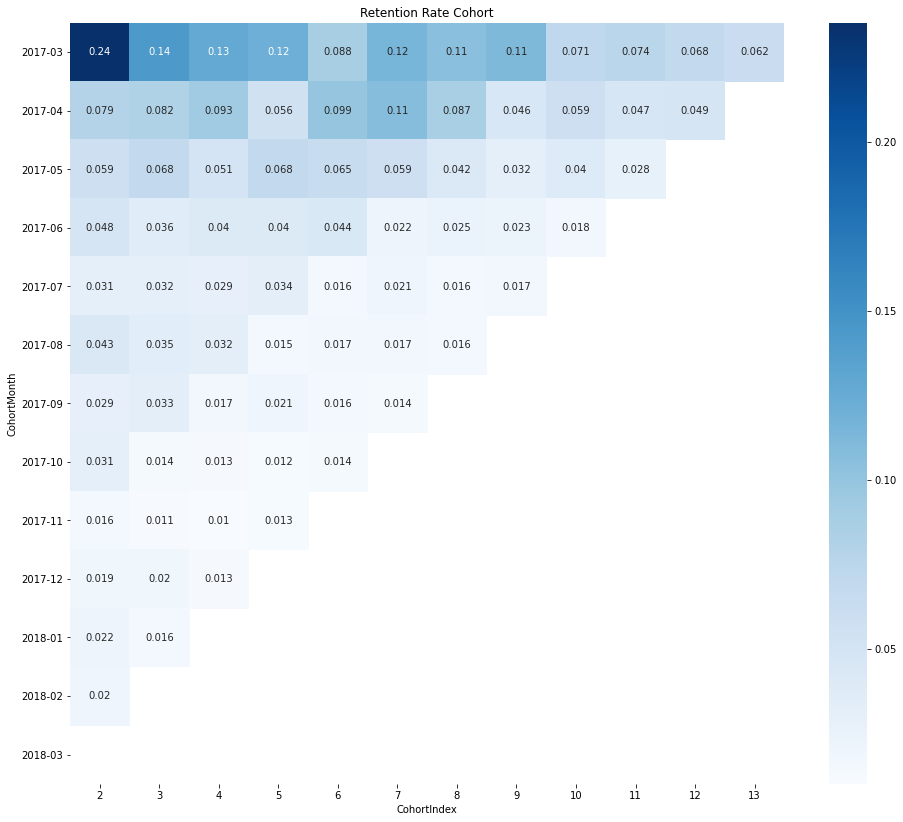

In [22]:
# Retention Rate Cohort
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
plt.figure(figsize=(16, 14))
plt.title('Retention Rate Cohort')
sns.heatmap(data=retention.iloc[:, 1:], annot=True, cmap='Blues')
plt.yticks(rotation=0)
plt.show()

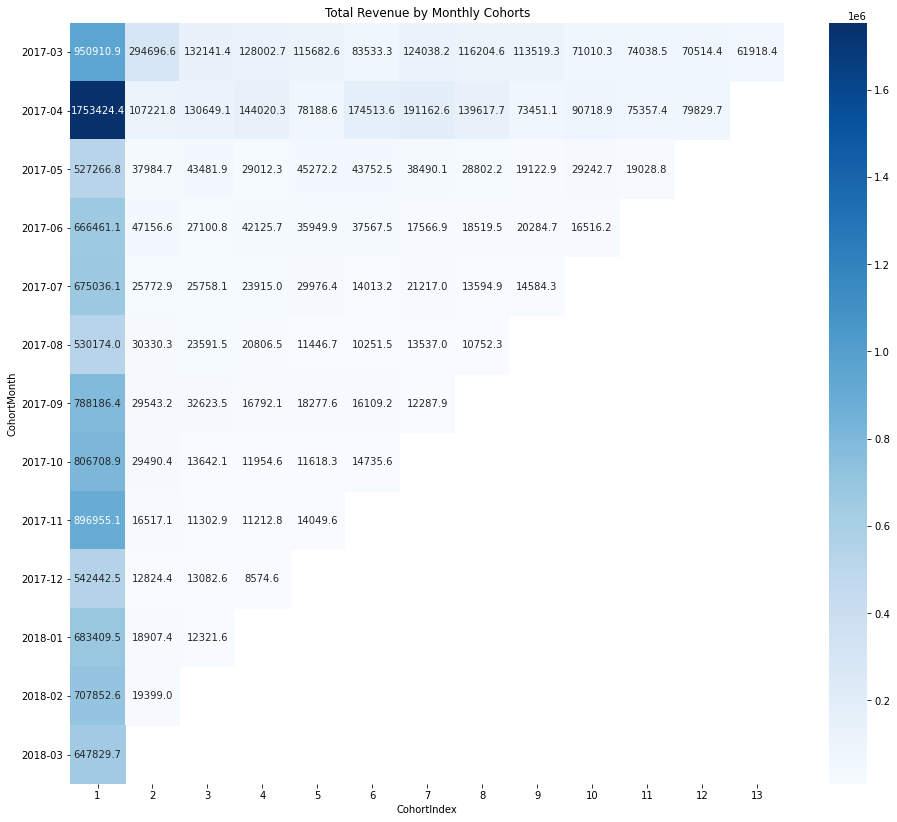

In [23]:
# Calculate total revenue by Monthly Cohorts
grouping = cleanData.groupby(['CohortMonth', 'CohortIndex']) 
cohort_data = grouping['Revenue'].sum()
cohort_data = cohort_data.reset_index()
average_revenue = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Revenue')
average_revenue.index = average_revenue.index.to_period('M')
plt.figure(figsize=(16, 14))
plt.title('Total Revenue by Monthly Cohorts')
sns.heatmap(data=average_revenue, annot=True, fmt=".1f", cmap='Blues')
plt.yticks(rotation=0)
plt.show()